# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support, f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, MinMaxScaler
from numpy import argmax
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
import itertools
import cv2
import pydotplus
from io import StringIO

# Fetch data from drive

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')
#d1=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv');
#d2=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv');
#d3=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv');
#d4=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv');
#d5=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv');
#d6=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', nrows=170366,encoding = 'unicode_escape');
#d7=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv');
#d8=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv');


# Fetch files from local storage

In [3]:
d1=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv');
d2=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv');
d3=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv');
d4=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv');
d5=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv');
d6=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', nrows=170366,encoding = 'unicode_escape');
d7=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv');
d8=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv');


In [4]:
frames = [d1,d2,d3,d4,d5,d6,d7,d8]
d = pd.concat(frames)
d.shape

(2830743, 85)

In [5]:
print(d.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  int64  
 3    Destination IP               object 
 4    Destination Port             int64  
 5    Protocol                     int64  
 6    Timestamp                    object 
 7    Flow Duration                int64  
 8    Total Fwd Packets            int64  
 9    Total Backward Packets       int64  
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mean

# drop NAN, INF values as the toal number of rows containing these values are only about 2800 from the total of 2830743 rows

In [6]:
d.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
d.dropna(inplace=True)
print(d)

                                         Flow ID       Source IP  \
0        192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165   
1          192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216   
2          192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216   
3        192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25   
4        192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102   
...                                          ...             ...   
692698    192.168.10.3-192.168.10.14-53-51114-17   192.168.10.14   
692699    192.168.10.3-192.168.10.16-53-24054-17   192.168.10.16   
692700  192.168.10.51-23.208.163.130-58030-443-6  23.208.163.130   
692701    192.168.10.3-192.168.10.14-53-51694-17   192.168.10.14   
692702    192.168.10.3-192.168.10.14-53-57949-17   192.168.10.14   

         Source Port  Destination IP   Destination Port   Protocol  \
0                443    192.168.10.5              54865          6   
1                 80    192.168.10.5       

In [7]:
#check for any null values in the dataset
d.isnull().sum().sum()

0

# Lets look at the categorical feature ' Destination Port'.

array([[<AxesSubplot:title={'center':' Destination Port'}>]], dtype=object)

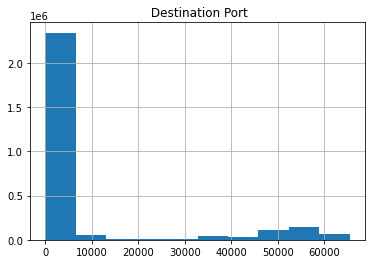

In [8]:
d.hist(column=" Destination Port")

Text(0.5, 1.0, 'Top 10 ports')

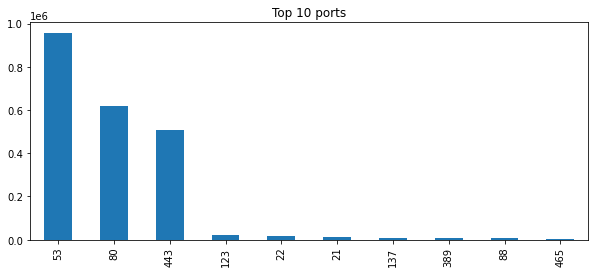

In [9]:
top_10 = d[' Destination Port'].value_counts()[:10]
top_10.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 ports')

# Dropping the columns which are insignificant. The values in these columns are all zero or a constant value throught the column

In [11]:
d = d.drop(columns = [' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'])

# Make X and y from the dataset

In [12]:
d.iloc[:, -1]

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name:  Label, Length: 2827876, dtype: object

In [13]:
le = LabelEncoder()
d.iloc[:, -1] = le.fit_transform(d.iloc[:, -1])
y = d.iloc[:, -1]

X = d.iloc[:,7:74]
XNum = X
XNum

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3,2,0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2,0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,32215,4,2,112.0,152.0,28.0,28.0,28.0,0.00000,76.0,...,3,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692699,324,2,2,84.0,362.0,42.0,42.0,42.0,0.00000,181.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692700,82,2,1,31.0,6.0,31.0,0.0,15.5,21.92031,6.0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692701,1048635,6,2,192.0,256.0,32.0,32.0,32.0,0.00000,128.0,...,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y

0         0
1         0
2         0
3         0
4         0
         ..
692698    0
692699    0
692700    0
692701    0
692702    0
Name:  Label, Length: 2827876, dtype: int32

In [15]:
df_features = XNum.columns.tolist()
df_features

[' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' ECE Flag Count',
 ' 

# Robost scaling - it uses percentiles instead of min and max values of the column for scaling. This helps the distribution to not get affected by the outliers in the column but at the same time keeps the outliers as it is in the columns.

In [16]:
Scale = RobustScaler().fit(XNum)
scaled = Scale.transform(XNum)

X_scaled = pd.DataFrame(data = scaled, columns = df_features)

In [17]:
X = X_scaled
X


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.009641,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,-0.5,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.009659,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,-0.5,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.009664,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,-0.5,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,0.000271,0.666667,0.000000,0.284091,0.060166,-0.120000,0.722222,-0.136364,0.000000,-0.010714,...,1.0,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2827872,-0.009575,0.000000,0.000000,0.125000,0.495851,0.066667,1.111111,0.181818,0.000000,0.364286,...,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2827873,-0.009649,0.000000,-0.333333,-0.176136,-0.242739,-0.080000,-0.055556,-0.420455,0.837838,-0.260714,...,-0.5,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2827874,0.314057,1.333333,0.000000,0.738636,0.275934,-0.066667,0.833333,-0.045455,0.000000,0.175000,...,2.0,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# frequency encode destination port

In [18]:
# grouping by frequency
fq = d.groupby(' Destination Port').size()/len(d)   
# mapping values to dataframe
d.loc[:, "{}_freq_encode".format(' Destination Port')] = d[' Destination Port'].map(fq)  
d.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
X = X.join(d[' Destination Port_freq_encode'])
X

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Destination Port_freq_encode
0,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000006
1,-0.009641,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000008
2,-0.009659,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000085
3,-0.009664,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000003
4,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,0.000271,0.666667,0.000000,0.284091,0.060166,-0.120000,0.722222,-0.136364,0.000000,-0.010714,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338760
2827872,-0.009575,0.000000,0.000000,0.125000,0.495851,0.066667,1.111111,0.181818,0.000000,0.364286,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338760
2827873,-0.009649,0.000000,-0.333333,-0.176136,-0.242739,-0.080000,-0.055556,-0.420455,0.837838,-0.260714,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000008
2827874,0.314057,1.333333,0.000000,0.738636,0.275934,-0.066667,0.833333,-0.045455,0.000000,0.175000,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338760


# Lets look at categorical feature protocol.

In [10]:
d[" Protocol"].value_counts()

6     1826704
17     999476
0        1696
Name:  Protocol, dtype: int64

# one hot encoding for protocol

In [19]:
le = LabelEncoder()
label_encoded = le.fit_transform(d[" Protocol"])
print(label_encoded)
ohe = OneHotEncoder(sparse=False)
label_encoded = label_encoded.reshape(len(label_encoded), 1)
onehot_encoded = ohe.fit_transform(label_encoded)
onehot_encodedDF = pd.DataFrame(ohe.fit_transform(label_encoded))
onehot_encodedDF.rename(columns={0:'PROTOCOL 0',
                   1:'PROTOCOL 6',
                   2:'PROTOCOL 17'}, inplace = True)
onehot_encodedDF.head()
X = X.join(onehot_encodedDF)
X



[1 1 1 ... 1 2 2]


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Destination Port_freq_encode,PROTOCOL 0,PROTOCOL 6,PROTOCOL 17
0,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0.0,1.0,0.0
1,-0.009641,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,1.0,0.0
2,-0.009659,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000085,0.0,1.0,0.0
3,-0.009664,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000003,0.0,1.0,0.0
4,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,0.000271,0.666667,0.000000,0.284091,0.060166,-0.120000,0.722222,-0.136364,0.000000,-0.010714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.338760,0.0,0.0,1.0
2827872,-0.009575,0.000000,0.000000,0.125000,0.495851,0.066667,1.111111,0.181818,0.000000,0.364286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.338760,0.0,0.0,1.0
2827873,-0.009649,0.000000,-0.333333,-0.176136,-0.242739,-0.080000,-0.055556,-0.420455,0.837838,-0.260714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,1.0,0.0
2827874,0.314057,1.333333,0.000000,0.738636,0.275934,-0.066667,0.833333,-0.045455,0.000000,0.175000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.338760,0.0,0.0,1.0


# Feature selection - we are trying out 2 types of feature selection methods.
# 1. RFE
# 2. ANOVA - (scroll down to ANOVA from here to use that)

# Feature selection using Reccursive feature elimination which uses Random Forest.

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [18]:
##Feature Selection

rfc = RandomForestClassifier(n_estimators=10);

## fit random forest classifier on the training set
rfc.fit(X_train, y_train);

## extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

## plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();


In [48]:
X = X[[' Packet Length Variance', 'Init_Win_bytes_forward', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Packet Length Std', ' Destination Port_freq_encode', 'PROTOCOL 0', 'PROTOCOL 6', 'PROTOCOL 17']]
X

,Packet Length Variance,Init_Win_bytes_forward,Bwd Packet Length Mean,Bwd Packet Length Std,Packet Length Std,Destination Port_freq_encode,PROTOCOL 0,PROTOCOL 6,PROTOCOL 17
0,-0.022500,-0.026608,-0.402235,0.0,-0.150000,0.000006,0.0,1.0,0.0
1,-0.022500,-0.027096,-0.368715,0.0,-0.150000,0.000008,0.0,1.0,0.0
2,-0.022500,-0.027096,-0.368715,0.0,-0.150000,0.000085,0.0,1.0,0.0
3,-0.022500,-0.026852,-0.368715,0.0,-0.150000,0.000003,0.0,1.0,0.0
4,-0.022500,-0.026730,-0.402235,0.0,-0.150000,0.000009,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2827871,-0.004643,-0.030758,0.022346,0.0,-0.016369,0.338760,0.0,0.0,1.0
2827872,0.166182,-0.030758,0.608939,0.0,0.284375,0.338760,0.0,0.0,1.0
2827873,-0.013798,0.092152,-0.368715,0.0,-0.056714,0.000008,0.0,1.0,0.0
2827874,0.035833,-0.030758,0.312849,0.0,0.091523,0.338760,0.0,0.0,1.0


In [49]:
y

0         0
1         0
2         0
3         0
4         0
         ..
692698    0
692699    0
692700    0
692701    0
692702    0
Name:  Label, Length: 2827876, dtype: int32

# Split the data in 70-30 ratio for classification

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [51]:
df_features = X_train.columns.tolist()
df_features


[' Packet Length Variance',
 'Init_Win_bytes_forward',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Packet Length Std',
 ' Destination Port_freq_encode',
 'PROTOCOL 0',
 'PROTOCOL 6',
 'PROTOCOL 17']

In [52]:
X_train =  pd.DataFrame(X_train, columns = df_features)

In [53]:
#decision tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train,y_train) 
DT_score=DT.score(X_test,y_test)
y_predict=DT.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(DT_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))

Accuracy of DT: 0.9906254751798463
Precision of DT: 0.9908660529922744
Recall of DT: 0.9906254751798463
F1-score of DT: 0.9900997165394892
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    681396
           1       0.78      0.63      0.70       587
           2       0.91      1.00      0.95     38408
           3       0.96      0.96      0.96      3088
           4       0.99      1.00      0.99     69037
           5       0.98      0.40      0.57      1650
           6       0.99      0.71      0.83      1739
           7       1.00      1.00      1.00      2380
           8       1.00      0.33      0.50         3
           9       0.90      0.82      0.86        11
          10       0.99      1.00      1.00     47641
          11       1.00      0.99      1.00      1769
          12       0.85      0.07      0.13       452
          13       0.40      0.33      0.36         6
          14       0.73      0.04      0.08       

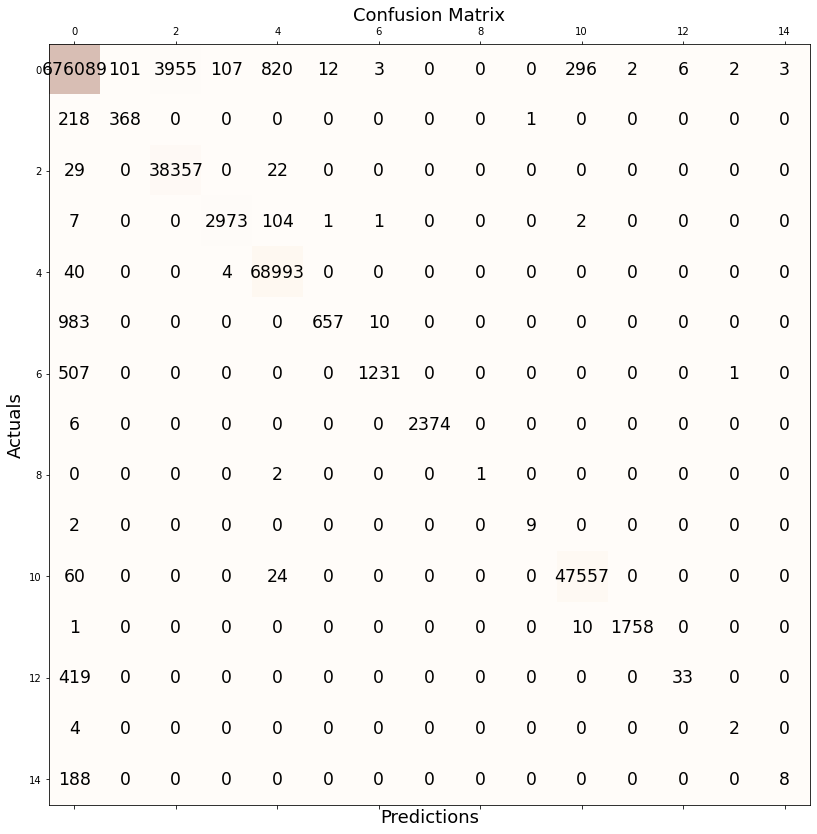

In [54]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
fig, ax = plt.subplots(figsize=(14, 14))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
fig.savefig('Confusion matrix.png')


[Text(215.90158248850335, 213.69103448275862, 'X[3] <= 19.053\ngini = 0.343\nsamples = 1979513\nvalue = [1589924, 1369, 89617, 7205, 161087, 3849, 4057, 5555\n8, 25, 111163, 4128, 1055, 15, 456]'),
 Text(142.721490645903, 206.19310344827585, 'X[0] <= -0.02\ngini = 0.224\nsamples = 1808246\nvalue = [1587962, 1369, 33139, 2460, 53079, 3846, 4057, 5555, 0\n25, 111104, 4128, 1054, 14, 454]'),
 Text(91.77956939799331, 198.6951724137931, 'X[0] <= -0.022\ngini = 0.486\nsamples = 682653\nvalue = [472648, 842, 32696, 1821, 52690, 2338, 2362, 2773, 0\n2, 111048, 2044, 941, 8, 440]'),
 Text(60.05440008361204, 191.19724137931036, 'X[5] <= 0.199\ngini = 0.298\nsamples = 523512\nvalue = [435112, 487, 32655, 1821, 45919, 2189, 1147, 13, 0\n1, 735, 2044, 941, 8, 440]'),
 Text(37.72273620401338, 183.69931034482758, 'X[5] <= 0.001\ngini = 0.017\nsamples = 360598\nvalue = [357510, 487, 3, 0, 0, 0, 0, 12, 0, 1, 541, 2044\n0, 0, 0]'),
 Text(14.532027591973243, 176.20137931034483, 'X[2] <= -0.37\ngini = 0.0

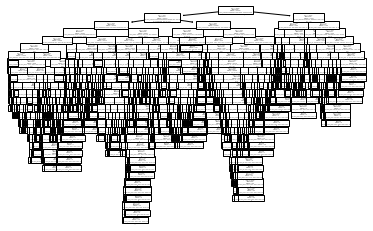

In [55]:
tree.plot_tree(DT)

# ANOVA

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [35]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

from sklearn.feature_selection import f_classif
### Compute the ANOVA F-value 
f_value = f_classif(X_train, y_train)

# f_value = pd.Series(f_value)
# f_value.index = X_train.columns
# f_value.sort_values(ascending=False)

# ### plot the ordered f_value per feature
# f_value.sort_values(ascending=False).plot.bar(figsize=(20, 8))

### Now we select the top 10 important features based on the result above.
from sklearn.feature_selection import SelectKBest
sel_top_cols = SelectKBest(f_classif, k=20)
sel_top_cols.fit(X_train, y_train)
X_train.columns[sel_top_cols.get_support()]




Index([' Flow Duration', 'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Std', ' Flow IAT Max',
       'Fwd IAT Total', ' Fwd IAT Std', ' Fwd IAT Max', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' PSH Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size',
       'Idle Mean', ' Idle Max', ' Idle Min', ' Destination Port_freq_encode'],
      dtype='object')

In [41]:
X = X[[' Flow Duration', 'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Std', ' Flow IAT Max',
       'Fwd IAT Total', ' Fwd IAT Std', ' Fwd IAT Max', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' PSH Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size',
       'Idle Mean', ' Idle Max', ' Idle Min', ' Destination Port_freq_encode']]
X

,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Std,Flow IAT Max,Fwd IAT Total,Fwd IAT Std,Fwd IAT Max,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,PSH Flag Count,Average Packet Size,Avg Bwd Segment Size,Idle Mean,Idle Max,Idle Min,Destination Port_freq_encode
0,-0.009674,-0.282143,-0.402235,0.0,-0.000199,-0.012434,-0.000033,0.000000,-0.000044,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.402235,0.0,0.0,0.0,0.000006
1,-0.009641,-0.260714,-0.368715,0.0,-0.000199,-0.012392,-0.000036,0.000000,-0.000047,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.368715,0.0,0.0,0.0,0.000008
2,-0.009659,-0.260714,-0.368715,0.0,-0.000199,-0.012415,-0.000036,0.000000,-0.000047,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.368715,0.0,0.0,0.0,0.000085
3,-0.009664,-0.260714,-0.368715,0.0,-0.000199,-0.012422,-0.000036,0.000000,-0.000047,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.368715,0.0,0.0,0.0,0.000003
4,-0.009674,-0.282143,-0.402235,0.0,-0.000199,-0.012434,-0.000033,0.000000,-0.000044,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.402235,0.0,0.0,0.0,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,0.000271,-0.010714,0.022346,0.0,0.019355,-0.000038,0.024445,0.265843,0.032121,-0.020913,-0.137250,-0.016369,-0.004643,0.0,-0.166373,0.022346,0.0,0.0,0.0,0.338760
2827872,-0.009575,0.364286,0.608939,0.0,0.000065,-0.012307,-0.000034,0.000000,-0.000045,0.178707,0.353837,0.284375,0.166182,0.0,0.350970,0.608939,0.0,0.0,0.0,0.338760
2827873,-0.009649,-0.260714,-0.368715,0.0,-0.000123,-0.012404,-0.000033,0.000000,-0.000043,-0.106464,-0.354423,-0.056714,-0.013798,0.0,-0.349794,-0.368715,0.0,0.0,0.0,0.000008
2827874,0.314057,0.175000,0.312849,0.0,0.539003,0.390715,0.820645,6.650770,1.046037,0.077947,-0.035149,0.091523,0.035833,0.0,-0.086420,0.312849,0.0,0.0,0.0,0.338760


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [44]:
#decision tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train,y_train) 
DT_score=DT.score(X_test,y_test)
y_predict=DT.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(DT_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))

Accuracy of DT: 0.9970236797220058
Precision of DT: 0.9969493986757293
Recall of DT: 0.9970236797220058
F1-score of DT: 0.9969674638589886
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    681396
           1       0.74      0.49      0.59       587
           2       1.00      1.00      1.00     38408
           3       0.99      0.99      0.99      3088
           4       0.99      0.99      0.99     69037
           5       0.98      0.99      0.99      1650
           6       0.99      0.99      0.99      1739
           7       1.00      1.00      1.00      2380
           8       1.00      1.00      1.00         3
           9       0.70      0.64      0.67        11
          10       0.99      1.00      1.00     47641
          11       0.98      0.98      0.98      1769
          12       0.71      0.65      0.68       452
          13       0.25      0.17      0.20         6
          14       0.41      0.40      0.41       

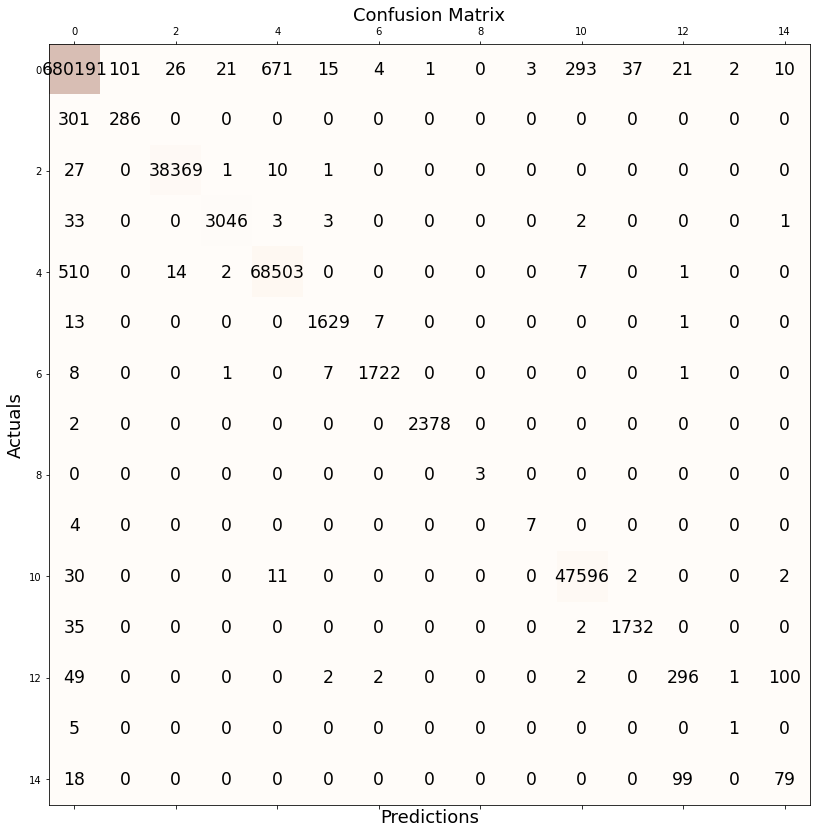

In [45]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
fig, ax = plt.subplots(figsize=(14, 14))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
fig.savefig('Confusion matrix.png')


[Text(272.06970019953155, 215.65770491803278, 'X[3] <= 19.053\ngini = 0.343\nsamples = 1979513\nvalue = [1589924, 1369, 89617, 7205, 161087, 3849, 4057, 5555\n8, 25, 111163, 4128, 1055, 15, 456]'),
 Text(213.87588826441342, 212.09311475409837, 'X[14] <= -0.457\ngini = 0.224\nsamples = 1808246\nvalue = [1587962, 1369, 33139, 2460, 53079, 3846, 4057, 5555, 0\n25, 111104, 4128, 1054, 14, 454]'),
 Text(117.19482088811942, 208.52852459016393, 'X[11] <= -0.137\ngini = 0.593\nsamples = 494660\nvalue = [288708, 356, 32591, 1821, 52572, 2058, 2005, 39, 0\n1, 111075, 2045, 941, 8, 440]'),
 Text(51.80554747514901, 204.9639344262295, 'X[19] <= 0.199\ngini = 0.42\nsamples = 341061\nvalue = [253574, 1, 32550, 1821, 45835, 1953, 1146, 13, 0, 0\n735, 2044, 941, 8, 440]'),
 Text(2.950033550688273, 201.39934426229507, 'X[19] <= 0.001\ngini = 0.024\nsamples = 216258\nvalue = [213657, 1, 3, 0, 0, 0, 0, 12, 0, 0, 541, 2044\n0, 0, 0]'),
 Text(0.5349336220772344, 197.83475409836066, 'X[7] <= 79.025\ngini = 0

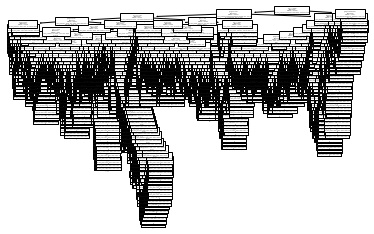

In [46]:
tree.plot_tree(DT)

# 